# Name: Mahek Saluja.   USC ID: 8231303227

# Question1
# b.i) Scatter Plots

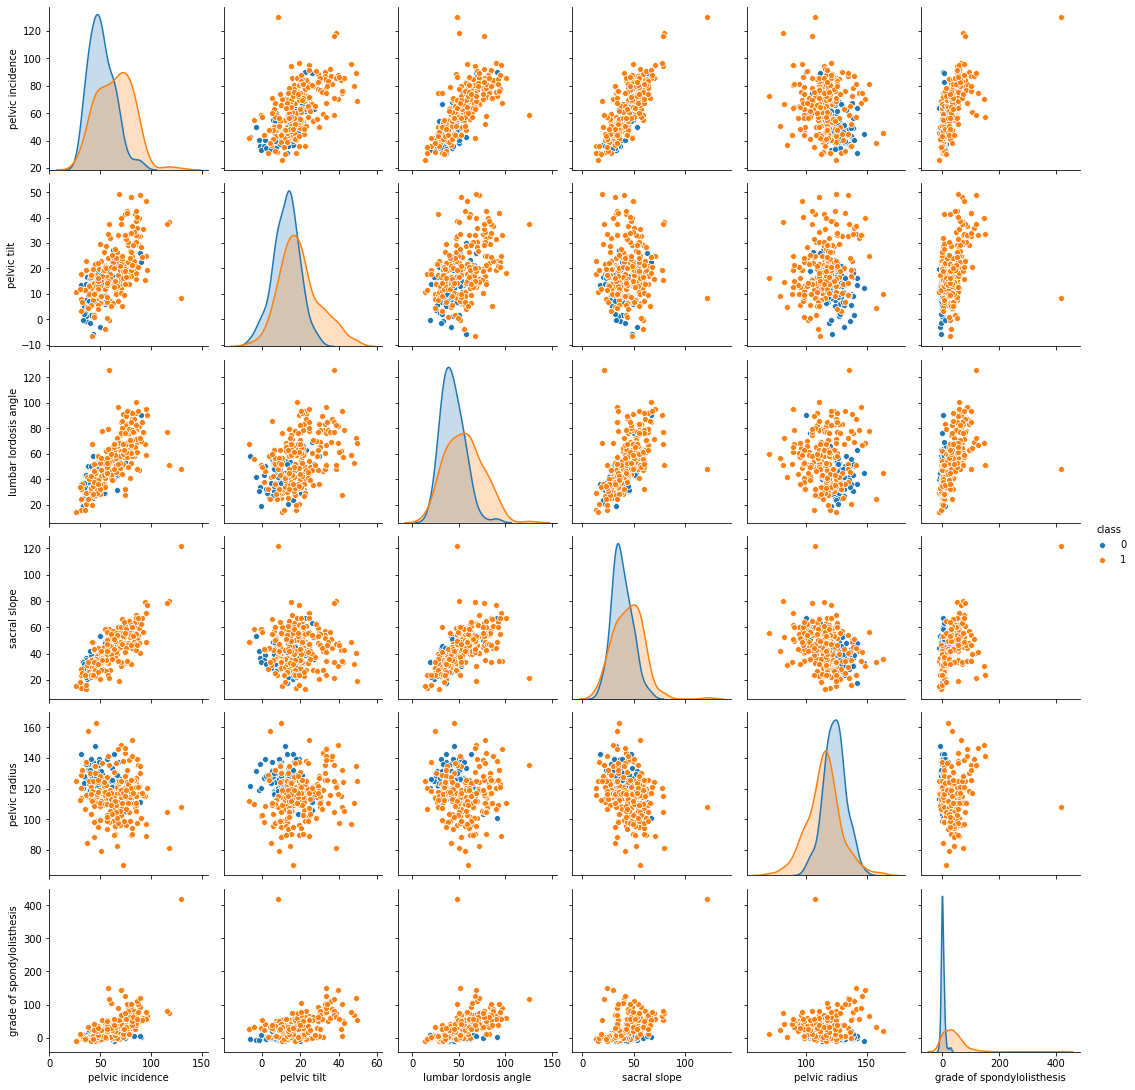

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_fscore_support
from tabulate import tabulate

f = pd.read_csv("../data/vertebral_column_data/column_2C.dat", sep=" ", header=None)
f.columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'class']
f["class"].replace({"AB": 1, "NO": 0}, inplace=True)
scatterplot = sns.pairplot(f, hue='class')



# b.ii) Box Plots

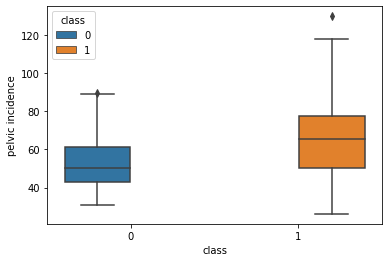

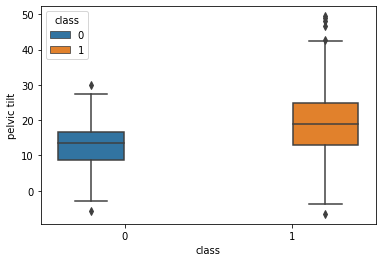

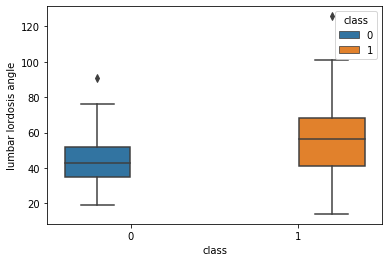

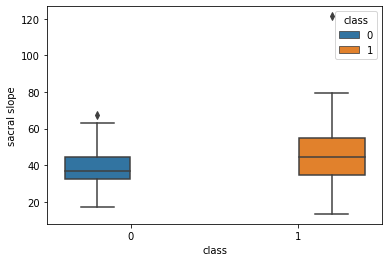

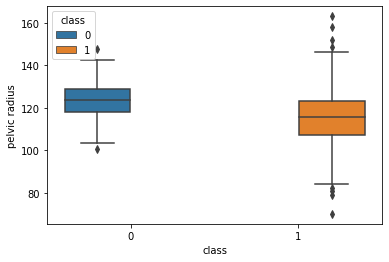

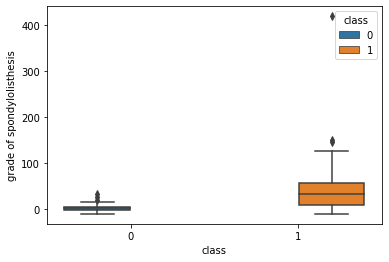

In [35]:
for i, col in enumerate(f.columns):
    if(col == "class"):
        continue
    plt.figure(i)
    sns.boxplot(data = f, x = "class",y=str(col), hue = "class")


# c.ii) Train error & Test error plots

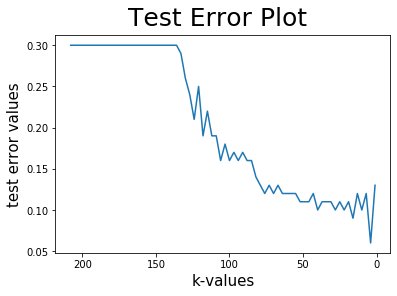

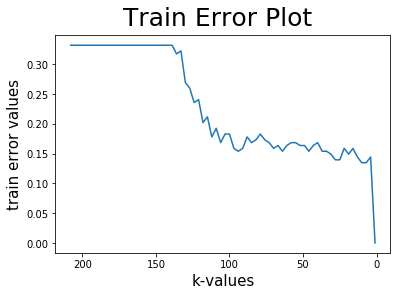

In [36]:
data_AB = f[f['class']==1]
data_NO = f[f['class']==0]
training_set = pd.concat([data_NO[0:69] , data_AB[0:139]])
test_set = pd.DataFrame(pd.concat([ data_AB[140:], data_NO[70:]]))
acc_max = 0
k_opt = 0
x_val = []
z_opt = None
y_val_test = []
y_val_train = []
for k in range(208, 0, -3):
    knn_4 = KNeighborsClassifier(n_neighbors = k)
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    z = knn_4.fit(x, y)
    res = knn_4.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    train_res = knn_4.score(training_set.iloc[:, 0:6], training_set.loc[:, 'class'])
    x_val.append(k)
    y_val_test.append(1-res)
    y_val_train.append(1-train_res)
    if res>acc_max:
        acc_max = res
        k_opt = k
        z_opt = z
#print(k_opt, acc_max)
fig = plt.figure()

plt.plot(x_val, y_val_test)
plt.xlabel("k-values", fontsize = 15)
plt.ylabel("test error values", fontsize = 15)
fig.suptitle('Test Error Plot', fontsize = 25)
plt.gca().invert_xaxis()
plt.show()
fig = plt.figure()
plt.plot(x_val, y_val_train)
plt.xlabel("k-values", fontsize = 15)
plt.ylabel("train error values", fontsize = 15)
fig.suptitle('Train Error Plot', fontsize = 25)
plt.gca().invert_xaxis()
plt.show()

# c.ii)  K* Value, Confusion Matrix, TPR, TNR, Precision, F-Score

In [37]:
print("Optimal Value of K is : ", k_opt)
x = test_set.iloc[:,0:6]
y= test_set.loc[:,'class'].to_numpy()
y_pred = z_opt.predict(x)
matrix = confusion_matrix(y, y_pred)
print("--------------------------------------------")
print("Confusion Matrix is : ")
print(matrix)
tpr = matrix[1][1]/(matrix[1][1] + matrix[1][0])
tnr = matrix[0][0]/(matrix[0][0] + matrix[0][1])
precision = matrix[1][1]/(matrix[1][1] + matrix[0][1])
fscore = 2*matrix[1][1]/(2*matrix[1][1] + matrix[0][1] + matrix[1][0])

print("--------------------------------------------")
print("Class 1 considered as Positive")
print("--------------------------------------------")
print("True Positive Rate : ", tpr)
print("--------------------------------------------")
print("True Negative Rate : ", tnr)
print("--------------------------------------------")
print("Precision is : ", precision)
print("--------------------------------------------")
print("F-Score is : ", fscore)



tpr = matrix[0][0]/(matrix[0][0] + matrix[0][1])
tnr = matrix[1][1]/(matrix[1][1] + matrix[1][0])
precision = matrix[0][0]/(matrix[0][0] + matrix[1][0])
fscore = 2*matrix[0][0]/(2*matrix[0][0] + matrix[0][1] + matrix[1][0])
print("")
print("")
print("--------------------------------------------")
print("Class 0 considered as Positive")
print("--------------------------------------------")
print("True Positive Rate : ", tpr)
print("--------------------------------------------")
print("True Negative Rate : ", tnr)
print("--------------------------------------------")
print("Precision is : ", precision)
print("--------------------------------------------")
print("F-Score is : ", fscore)

Optimal Value of K is :  4
--------------------------------------------
Confusion Matrix is : 
[[25  5]
 [ 1 69]]
--------------------------------------------
Class 1 considered as Positive
--------------------------------------------
True Positive Rate :  0.9857142857142858
--------------------------------------------
True Negative Rate :  0.8333333333333334
--------------------------------------------
Precision is :  0.9324324324324325
--------------------------------------------
F-Score is :  0.9583333333333334


--------------------------------------------
Class 0 considered as Positive
--------------------------------------------
True Positive Rate :  0.8333333333333334
--------------------------------------------
True Negative Rate :  0.9857142857142858
--------------------------------------------
Precision is :  0.9615384615384616
--------------------------------------------
F-Score is :  0.8928571428571429


# c.iii) Best Test Error Rate

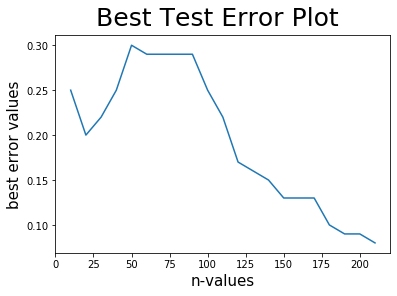

In [38]:
x_points=[]
min_err = []
for n in range(10, 211, 10):
    train_data = pd.concat([data_NO[0:int(n/3) ] , data_AB[0:n-int(n/3)]])
    opt_k = 0
    opt_acc = 0
    for k in range(1, n, 5):
        knn = KNeighborsClassifier(n_neighbors = k)
        x = train_data.iloc[:,0:6]
        y= train_data.loc[:,'class']
        z = knn.fit(x, y)
        res = knn.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
        if res>opt_acc:
            opt_acc = res
            opt_k = k
    #print("n : ", n, ",k : ", opt_k, ",acc : ", opt_acc)
    x_points.append(n)
    min_err.append(1 - opt_acc)
fig = plt.figure()
plt.plot(x_points, min_err)
plt.xlabel("n-values", fontsize = 15)
plt.ylabel("best error values", fontsize = 15)
fig.suptitle('Best Test Error Plot', fontsize = 25)
plt.show()

# d.i.A) Manhattan Distance (p=1)

In [39]:
acc_max = 0
k_opt = 0
z_opt = None
knn_opt = None
for k in range(1, 200, 5):
    knn_4 = KNeighborsClassifier(n_neighbors = k, p=1)
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    z = knn_4.fit(x, y)
    res = knn_4.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    #print("res : ", res, "k :", k)
    if res>acc_max:
        acc_max = res
        knn_opt= knn_4
        k_opt = k
        z_opt = z
print("Best k value is : ", k_opt)
print("Error rate at k=",k_opt," is : ", 1-acc_max)

Best k value is :  6
Error rate at k= 6  is :  0.10999999999999999


# d.i.B) Best log(p)

In [40]:
opt_p_log = 0
opt_acc = 0
for p_log in np.arange(0.1, 1.001, 0.1):
    p_val= pow(10, p_log)
    #print("p val : ", p_val)
    knn = KNeighborsClassifier(n_neighbors = k_opt, p=p_val)
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    z = knn.fit(x, y)
    res_new = knn.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    #print(res_new, p_log, k_opt)
    if res_new>opt_acc:
        opt_acc = res_new
        opt_p_log = p_log
print("Optimal log(p) is : ",opt_p_log)
print("Accuracy is :", opt_acc)

Optimal log(p) is :  0.6
Accuracy is : 0.94


# d.i.C) Chebyshev Distance

In [41]:
acc_max_new = 0
k_opt_new = 0
z_opt = None
knn_opt = None
for k in range(1, 200, 5):
    knn_4 = KNeighborsClassifier(n_neighbors = k, metric='chebyshev')
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    z = knn_4.fit(x, y)
    res = knn_4.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    #print("res : ", res, "k :", k)
    if res>acc_max_new:
        acc_max_new = res
        knn_opt= knn_4
        k_opt_new = k
        z_opt = z
print("Best k value is : ", k_opt_new)
print("Error rate at k=",k_opt_new," is : ", 1-acc_max_new)

Best k value is :  16
Error rate at k= 16  is :  0.07999999999999996


# d.ii) Mahalanobis Distance

In [42]:
k_opt_mahalanobis = 0
acc_opt = 0
for k in range(1, 200, 5):
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    knn_mahalanobis = KNeighborsClassifier(n_neighbors = k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(x.T))})
    z = knn_mahalanobis.fit(x, y)
    res = z.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    if res>acc_opt:
        acc_opt = res
        k_opt_mahalanobis = k
print("Best k value is : ", k_opt_mahalanobis)
print("Error rate at k=",k_opt_mahalanobis," is : ", 1-acc_opt)

Best k value is :  6
Error rate at k= 6  is :  0.17000000000000004


# Summarize Table

In [43]:
print(tabulate([['Best k',k_opt, k_opt_new, k_opt_mahalanobis], ['Error',1-acc_max,1-acc_max_new,1-acc_opt]], headers=['Manhattan', 'Chebyshev', 'Mahalanobis'], tablefmt='orgtbl'))

|        |   Manhattan |   Chebyshev |   Mahalanobis |
|--------+-------------+-------------+---------------|
| Best k |        6    |       16    |          6    |
| Error  |        0.11 |        0.08 |          0.17 |


# e) Majority Polling replaced by Weighted Decision

In [44]:
acc_max_euclidian = 0
k_opt_euclidian = 0
for k in range(1, 200, 5):
    knn_euclidian = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    z = knn_euclidian.fit(x, y)
    res = knn_euclidian.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    if res>acc_max_euclidian:
        acc_max_euclidian = res
        k_opt_euclidian = k
#print("Euclidian : ", k_opt_euclidian, acc_max_euclidian)

acc_max_manhattan = 0
k_opt_manhattan = 0
for k in range(1, 200, 5):
    knn_manhattan = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p=1)
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    z = knn_manhattan.fit(x, y)
    res = knn_manhattan.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    if res>acc_max_manhattan:
        acc_max_manhattan = res
        k_opt_manhattan = k
#print("Manhattan : ", k_opt_manhattan, acc_max_manhattan)

acc_max_chebyshev = 0
k_opt_chebyshev = 0
for k in range(1, 200, 5):
    knn_chebyshev = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric='chebyshev')
    x = training_set.iloc[:,0:6]
    y= training_set.loc[:,'class']
    z = knn_chebyshev.fit(x, y)
    res = knn_chebyshev.score(test_set.iloc[:, 0:6], test_set.loc[:, 'class'])
    if res>acc_max_chebyshev:
        acc_max_chebyshev = res
        k_opt_chebyshev = k
#print("chebyshev : ", k_opt_chebyshev, acc_max_chebyshev)

print(tabulate([['Best k',k_opt_euclidian, k_opt_manhattan, k_opt_chebyshev], ['Error',1-acc_max_euclidian,1-acc_max_manhattan,1-acc_max_chebyshev]], headers=['Euclidian', 'Manhattan', 'Chebyshev'], tablefmt='orgtbl'))
#print(tabulate([['Euclidian',k_opt_euclidian, 1-acc_max_euclidian], ['Manhattan', k_opt_manhattan,1-acc_max_manhattan], ['Chebyshev', k_opt_chebyshev,1-acc_max_chebyshev]], headers=['Metric', 'Opt K(K*)', 'Error'], tablefmt='orgtbl'))


|        |   Euclidian |   Manhattan |   Chebyshev |
|--------+-------------+-------------+-------------|
| Best k |         6   |        26   |       16    |
| Error  |         0.1 |         0.1 |        0.11 |


# f) Lowest training error

## Lowest training error found is 0 for k=1 for Majority Polling Euclidian Matrix